# Питон и машинное обучение: нейронные сети и компьютерное зрение

## Модуль 1. Вводное занятие

Знакомство с библиотекой PyTorch:

 - Установка и настройка PyTorch, основные модули
 - Понятие тензора, операции с тензорами в PyTorch
 - Перенос объектов между numpy и PyTorch
 - Представление визуальной информации для дальнейшей обработки в PyTorch: библиотеки PIL, OpenCV
 - Показ изображений и видео в jupyter notebook

In [ ]:
import torch
import numpy as np

### 1. Установка PyTorch

‼️ Если вы проходите курс в __Google Golab__ - игнорируйте данный пункт.

Если вы проходите курс локально, на виртуальном сервере в облаке или в любой другой среде, которую вы полностью контролируете - рекомендуется выполнять этот курс в отдельной среде python env/venv.

Для пользователей Anaconda/Miniconda:

In [ ]:
!conda install -y pytorch::pytorch torchvision -c pytorch

Для тех, у кого python установлен без среды "conda":

In [ ]:
!pip3 install torch torchvision

### 2. Тензоры в PyTorch

Проще всего представить тензор как __многомерный массив__. 
Каждый тензор имеет ранг, соответствующий его размерному пространству. 
Простой скаляр (например, 1) может быть представлен в виде тензора ранга 0, 
вектор — ранга 1, матрица n × n — ранга 2 и т.д.



In [ ]:
t1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]]) # создаем тензор из списка списков
print(t1)

print()

a1 = np.random.randint(0,10, (3,3)) # создаем тензор из массива numpy
t2 = torch.tensor(a1)
print(a1)
print()
print(t2)

In [ ]:
# можно создавать тензоры при помощи встроенных функций, как в numpy
print(torch.zeros(3,3))
print(torch.ones(2,2))
print(torch.full((3,3), torch.pi))
print(torch.rand(2,2))
print(torch.randint(0,10, (2,2)))

In [ ]:
# доступ к элементам тензоров - все как мы привыкли
t1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(t1)
print(t1[0,2])
print(t1[1])
print(t1[:,1])

t1[2,2] = 100500
print(t1)

t1[:,2] = torch.tensor([42,42,42]) # срезы работают и на запись
print(t1)

In [ ]:
# работает broadcasting, как и в numpy
t1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(t1)

t100 = t1 * 100
print(t100)

t101 = t1 + t100
print(t101)

t1000 = torch.tensor([1000, 2000, 3000])
t1001 = t1 + t1000
print(t1001)

In [ ]:
# работают булевы маски, как и в numpy
t1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print( t1[ t1 > 5 ] )
print( t1 > 5 )

In [ ]:
# как и в numpy, можно изменять размерность тензора
t1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(t1.flatten())
print(t1.reshape((9,1)))

print()

# добавить размернось тензору
t1_133 = t1.unsqueeze(0)
print(t1_133)
print(t1_133.shape)
t1_33 = t1_133.squeeze(0)
print(t1_33)
print(t1_33.shape)

print()

# важно для обработки изображений - функция permute
t_hwc = torch.rand(640, 480, 3) #высота-ширина-канал

t_chw = t_hwc.permute(2,0,1) # меняем на канал-ширина-высота
print(t_chw.shape)

# можно создать представление исходного тензора в виде тензора нужной нам размерности
print(t1.view(9))
t1[1,1] = 100500
print(t1.view(9))

In [ ]:
# изменение типов данных в тензорах
t1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(t1.type())
t1_float = t1.to( dtype=torch.float64 )
print(t1_float.type())
t1_float16 = t1.to( dtype=torch.float16 )
print(t1_float16.type())

In [ ]:
# математические функции
t_rand = torch.rand(3,3)
print(t_rand)
t_rand_log = t_rand.log2() # функция без подчеркивания (_) вернет новый тензор
print(t_rand_log)
t_rand.log2_() # функция с подчеркиванием в конце имени произведет вычисления "inplace"
print(t_rand)

In [ ]:
# операции из области линейной алгебры

# скалярное произведение векторов
v1 = torch.tensor([1,2,3])
v2 = torch.tensor([3,2,1])
print( torch.dot(v1, v2) ) 

# умножение матриц
m1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]]).to(dtype=torch.float32)
m2 = torch.eye(3) * 10
print( torch.mm(m1, m2) )

### 3. Аппаратное ускорение PyTorch

Три варианта:
 - CPU: центральный процессор 👎
 - CUDA: графический ускоритель, поддерживающий Compute Unified Device Architecture компании NVIDIA 👍
 - MPS: аппаратный ML-ускоритель на системе Apple Silicon 🧘‍♀️ 
 
 ‼️ Для тех, кто проходит курс на __Google Colab__: выберите Runtime Type, поддерживающий GPU. (потребуется перезапуск блокнота)


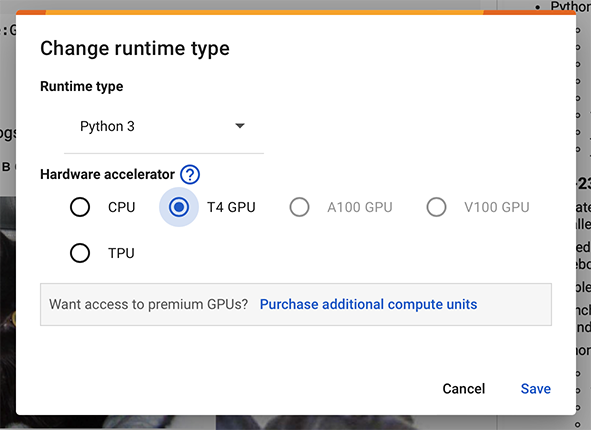


In [ ]:
device = "cuda" if torch.cuda.is_available() else \
    "mps" if torch.backends.mps.is_built() else "cpu"
device

In [ ]:
# перенос тензора в память аппаратного ускорителя
t1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(t1.device)
t1.to(device)
print(t1.device)

In [ ]:
# замер времени выполнения на примере операции матричного умножения
m_cpu = torch.rand((10000, 10000), device='cpu')
m_accel = torch.rand((10000, 10000), device=device)

%time torch.matmul(m_cpu, m_cpu)
%time torch.matmul(m_accel, m_accel)

print()

### 4. Библиотеки для предобработки изображений: PIL, OpenCV, etc

PIL - наиболее часто используемая библиотека для загрузки и предварительной обработки изображений. Рассмотрим, как преобразовывать изображения из файлов на диске в тензоры PyTorch.

In [ ]:
from PIL import Image
from torchvision import transforms

lena = Image.open('lena.jpg')
display(lena)

print("Размеры изображения: {}x{}".format( *lena.size ))

In [ ]:
# некоторые полезные функции PIL, например, изменение размеров изображения
lena_big = lena.resize( (512, 512), Image.LANCZOS ) 
display(lena_big)

print("Размеры изображения: {}x{}".format( *lena_big.size ))

In [ ]:
# можно создавать тензоры из массивов numpy ...
lena_np = np.array(lena)
t_lena_np = torch.tensor(lena_np)
print(t_lena_np.shape)
print(t_lena_np.type())

print()

# ...но для дальнейшей работы их нужно нормировать и преобразовывать в chw-формат
t_lena_np = t_lena_np.to(torch.float32) 
t_lena_np /= t_lena_np.max() - t_lena_np.min()
t_lena_np = t_lena_np.permute(2,0,1)
print(t_lena_np.shape)
print(t_lena_np.type())
print(t_lena_np)

In [ ]:
# модуль transforms позволяет получать сразу нормированные тензоры в chw-формате
t_lena = transforms.ToTensor()(lena)

print(t_lena.shape)
print(t_lena.type())
print(t_lena)

#### Получение тензоров из объектов OpenCV

OpenCV - популярная библиотека с богатейшим функционалом для решения задач компьютерного зрения. Иногда, работая с PyTorch, приходится иметь дело с объектами этой библиотеки. Но тут есть "подводные камни".

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

lena_cv2 = cv2.imread("lena.jpg")

plt.imshow(lena_cv2)


In [ ]:
lena_rgb = cv2.cvtColor(lena_cv2, cv2.COLOR_BGR2RGB)

t_lena_cv2 = transforms.ToTensor()(lena_rgb)

print(t_lena_cv2.shape)
print(t_lena_cv2.type())
print(t_lena_cv2)

#### Обратное преобразование - из тензора в PIL

In [ ]:
lena_np = transforms.ToPILImage()(t_lena_np)
lena_pt = transforms.ToPILImage()(t_lena)
lena_cv = transforms.ToPILImage()(t_lena_cv2)

display(lena_np, lena_pt, lena_cv)

### Практика

Для данного изображения (или любого другого) средствами PyTorch выполните его преобразование в монохромное изображение и выведите его на экран.

In [ ]:
# ваш код здесь


### 5. Визуализация тепловых карт

Довольно часто возникает необходимость визуализировать результат работы нейросети поверх исходного изображения, например, в виде тепловой карты (heatmap), наложенной поверх исходного изображения.

In [ ]:
# в качестве примера возьмем a-канал из "Лены", преобразованной в LAB-формат
lena_lab_a = cv2.cvtColor(lena_rgb, cv2.COLOR_RGB2LAB)[:,:,1]
lena_lab_a = cv2.threshold(lena_lab_a,140,255,cv2.THRESH_BINARY)[1]
lena_lab_a = cv2.GaussianBlur(lena_lab_a,(13,13), 11)
plt.imshow(lena_lab_a, cmap='gray')

In [ ]:
# сделаем из унылого ч/б изображения что-то повеселее
lena_heatmap = cv2.applyColorMap(lena_lab_a, cv2.COLORMAP_JET)
plt.imshow(lena_heatmap)

In [ ]:
plt.imsave('lena_heat_example.jpg', lena_heatmap)

In [ ]:
lena_w_heat = cv2.addWeighted(lena_heatmap, 0.5, lena_rgb, 0.5, 0)
plt.imshow(lena_w_heat)

### Практика

Разместите поверх данного изображения красный квадрат размером 10x10 пикселей, по координатам его левого верхнего угла 15, 15.

In [ ]:
# ваш код здесь


### 6. Воспроизведение и обработка видео


In [ ]:
from IPython.display import Video

Video("LArrivee_dun_train.m4v")